In [6]:
import random
import numpy as np
import os
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset
from torch.autograd import Variable
#from sklearn.model_selection import train_test_split
import torchvision
import torchvision.transforms as transforms

from PIL import Image
import cv2
import matplotlib.pyplot as plt
import glob
import matplotlib.pyplot as plt


In [29]:
sys.path.append("..")
from dataloader import Dataload
from utils.plot import plot_rect

In [30]:
from  train import Train

[0]
detect set : [0]
use gpu: True


In [150]:
def plot_rect(image, label):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    width,height,dimension = image.shape
    # print(image.shape)
    # print("width : {} height : {}".format(width,height) )
    # width,height = 128,128
    tag = label['pred_logits']
    tag = torch.argmax(tag.view(-1, 9),1)
    print(tag)
    label = label['pred_boxes']
    index =0
    for coord in label:
        coord = coord.cpu()
        # print(coord.shape)
        index += 1
        for data in coord:
            x,y,w,h= data
            leftx = width*(x - w/2)
            lefty = height*(y - h/2)
            W = w * width
            H = h * height
            plt.gca().add_patch(
                plt.Rectangle(
                    xy=(leftx,lefty),
                    width=W,
                    height=H,
                    edgecolor='red',
                    fill=False, linewidth=1
                )
            )
            plt.text(leftx, lefty, '{}'.format(int(tag[index])), ha='center', va='center')
    return

In [4]:
from train import Train
batch_size = 128
image_size = 128
data_path = r"E:\Dataset\training_set\train"

method_dict ={
    0:"densecoord",
    1:"mixfpn",
}

trainer = Train(
    3, 8, image_size,
    name = "mixfpn",
    method_type = 1,
    is_show = False
    )

build miffpn model


In [7]:
# img = torch.ones([3, 128, 128])
trainer.model.load_state_dict(torch.load(r'E:\workspace\face\face\Algae_detect\save\mixfpn\model_2022_10_19_16_28_49_890608.pkl'))

<All keys matched successfully>

In [16]:
path = r"E:\Dataset\training_set\train\images\706.png"
img  = cv2.imread(path)
reimg  = cv2.resize(img,(128,128))
trans = transforms.Compose([transforms.ToTensor(),
                            # transforms.Resize(3,128,128),
                            ])
res_img = trans(reimg)
res_img.shape

torch.Size([3, 128, 128])

In [156]:
res['pred_boxes'].squeeze().shape

torch.Size([25, 4])

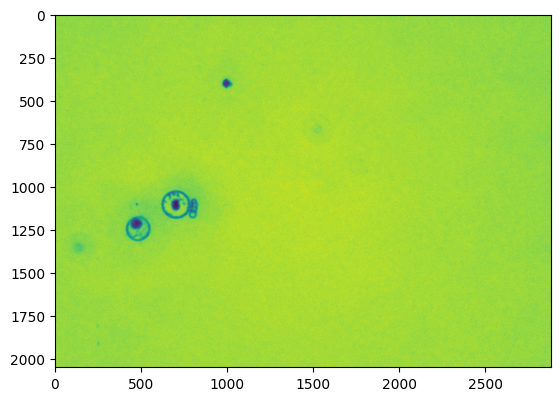

In [15]:
plt.imshow(res_img[0,:,:])
plt.show()

In [67]:
def plot_rect(image, label):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    if(len(image.shape) == 3):
        width,height,channel = image.shape
    else:
        width,height = image.shape

    if isinstance(label,dict):
        tag = label['pred_logits']
        tag = torch.argmax(tag.view(-1, 9),1)
        label = label['pred_boxes']
    if label.device != 'cpu':
        label = label.cpu()
    if len(label.shape) == 3:
        label = label.squeeze()
    index =0
    for coord in label:
        if(len(coord) == 5):
            class_number, x,y,w,h = coord
        else:
            x,y,w,h = coord
            class_number = tag[index]
        if (class_number != 8):
            centerx = width*(x - w/2)
            centery = height*(y - h/2)
            W = w * width
            H = h * height
            plt.gca().add_patch(
                plt.Rectangle(
                    xy=(centerx,centery),
                    width=W,
                    height=H,
                    edgecolor='red',
                    fill=False, linewidth=1
                )
        )
        plt.text(centerx, centery, '{}'.format(int(class_number)), ha='center', va='center')
    return

D:\soft\Anaconda\envs\pytorch\lib\site-packages\torch\nn\functional.py:3722: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


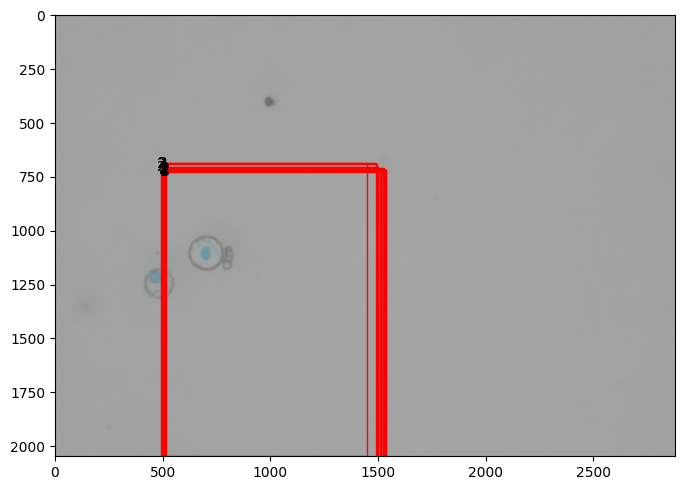

In [68]:
res = trainer.predict_each(res_img)
plot_rect(img,res)

In [ ]:
batch_size = 1
train_dataloader = Dataload(r"E:\Dataset\training_set\train",same_matrix=False)
train_loader= DataLoader(
    dataset = train_dataloader,
    batch_size = batch_size,
    shuffle = False,
    drop_last = True
)


In [5]:
x = [float(i) for i in range(8)]
y= [False for i in range(8)]
pos = []
i =-1
for data in train_loader:
    i +=1
    img,label = data
    # print(label)
    # print(label[0][0])
    if(label[0][0][0] in x and y[int(label[0][0][0])] == False ):
        pos.append(i)
        y[int(label[0][0][0])] =True
        # print(label[0][0][0])
        # plt.imshow(num_img)

In [6]:
pos

[0, 12, 117, 222, 223, 232, 327, 432]

In [10]:
train_dataloader[pos[0]][0].shape

torch.Size([3, 128, 128])

In [5]:
img  = torch.ones([3,128,128])

In [7]:
img.shape[1]

128

In [4]:
from train import Train

trainer = Train(3, 8, 128, False)


res =trainer.predict_each(img)

[0]
detect set : [0]
use gpu: True
tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])
torch.Size([3, 128, 128])


ValueError: expected 4D input (got 3D input)

In [10]:
res['pred_logits'].shape

torch.Size([4, 25, 9])

In [11]:
res['pred_boxes'].shape

torch.Size([4, 25, 4])

In [13]:
train_size = int(len(train_dataloader.photo_set) * 0.8)
test_size = int(len(train_dataloader.photo_set)) - train_size
train_data,test_data = torch.utils.data.random_split(train_dataloader,[train_size,test_size])

print(test_data)

In [27]:
for data in train_data:
    print(data[1].shape)

torch.Size([1, 5])
torch.Size([7, 5])
torch.Size([4, 5])
torch.Size([3, 5])
torch.Size([2, 5])
torch.Size([2, 5])
torch.Size([4, 5])
torch.Size([4, 5])
torch.Size([8, 5])
torch.Size([3, 5])
torch.Size([3, 5])
torch.Size([2, 5])
torch.Size([1, 5])
torch.Size([2, 5])
torch.Size([2, 5])
torch.Size([2, 5])
torch.Size([2, 5])
torch.Size([10, 5])
torch.Size([2, 5])
torch.Size([6, 5])
torch.Size([2, 5])
torch.Size([1, 5])
torch.Size([6, 5])
torch.Size([4, 5])
torch.Size([3, 5])
torch.Size([1, 5])
torch.Size([2, 5])
torch.Size([4, 5])
torch.Size([1, 5])
torch.Size([5, 5])
torch.Size([2, 5])
torch.Size([4, 5])
torch.Size([5, 5])
torch.Size([2, 5])
torch.Size([3, 5])
torch.Size([5, 5])
torch.Size([7, 5])
torch.Size([4, 5])
torch.Size([9, 5])
torch.Size([6, 5])
torch.Size([3, 5])
torch.Size([2, 5])
torch.Size([3, 5])
torch.Size([3, 5])
torch.Size([4, 5])
torch.Size([9, 5])
torch.Size([2, 5])
torch.Size([1, 5])
torch.Size([6, 5])
torch.Size([3, 5])
torch.Size([3, 5])
torch.Size([8, 5])
torch.Size(

In [23]:
test_loader = DataLoader(dataset=test_data,batch_size=64,shuffle=False,drop_last=True)



In [26]:
for data in test_loader:
    print(data.shape)

RuntimeError: stack expects each tensor to be equal size, but got [2, 5] at entry 0 and [3, 5] at entry 1

In [5]:
from dataloader import Dataload

data_path = r"E:\Dataset\training_set\train"
All_dataloader = Dataload(r"E:\Dataset\training_set\train")
batch_size = 128
image_size = 128
train_size = int(len(All_dataloader.photo_set) * 0.8)
print(train_size)
validate_size = int(len(All_dataloader.photo_set) - train_size

train_data,test = torch.utils.data.random_split(All_dataloader , [train_size, validate_size])
print("训练集大小: {} 测试集大小: {} , ".format(train_size, validate_size))

validate_loader = DataLoader(
    dataset=test,
    batch_size=batch_size,
    shuffle=False,
    drop_last=True,
)

SyntaxError: invalid syntax (2981958002.py, line 12)

In [30]:
test_loader= DataLoader(
        dataset = validate_loader,
        batch_size = batch_size,
        shuffle = False,
        drop_last = True
    )
train_loader= DataLoader(
        dataset = train_dataset,
        batch_size = batch_size,
        shuffle = True,
        drop_last = True
    )

In [31]:
for i in test_loader:
    print(i)

In [32]:
len(test_loader)

0

In [13]:
for i in test_loader:
    print(i)

<Figure size 864x1152 with 0 Axes>

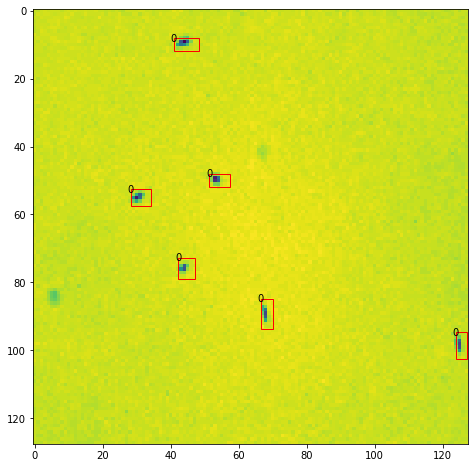

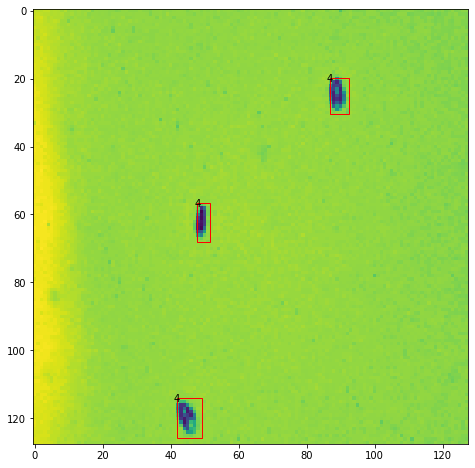

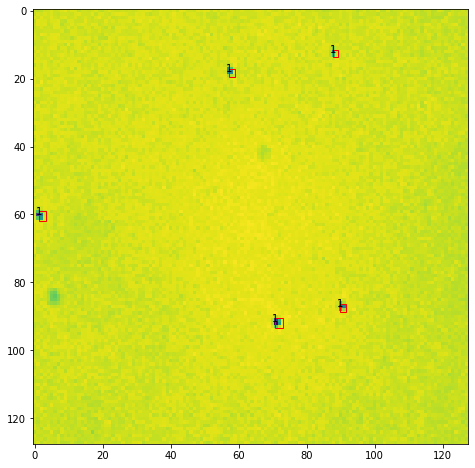

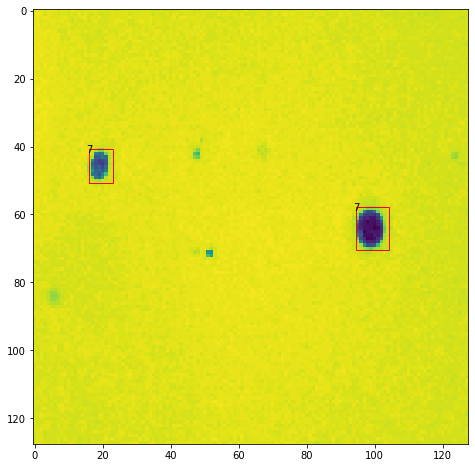

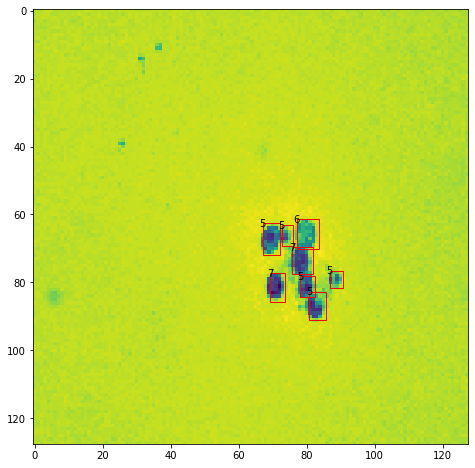

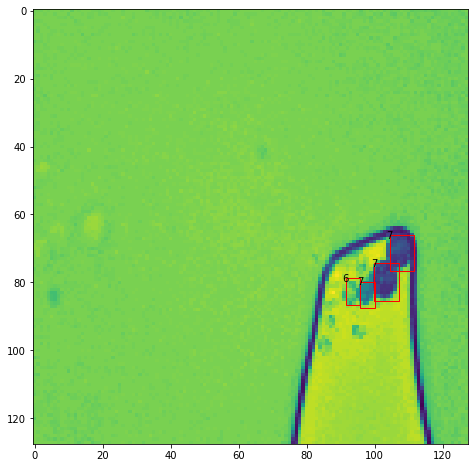

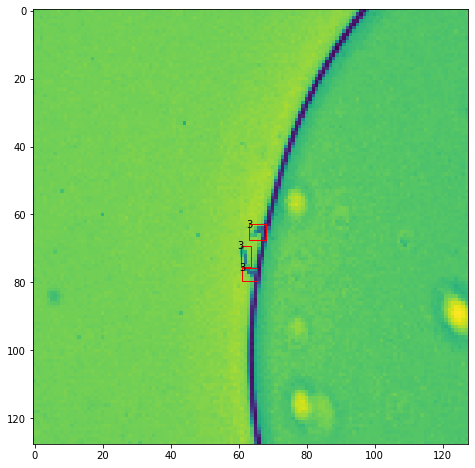

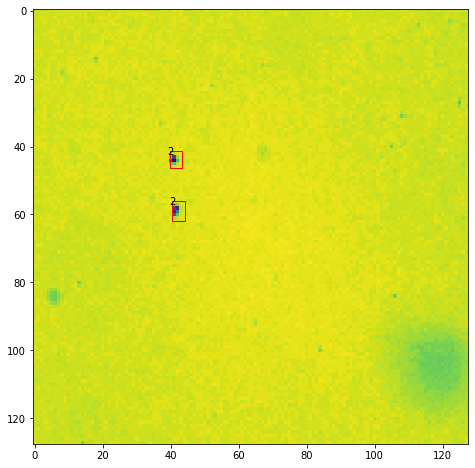

In [8]:
photo = []
photo_label = []
for i in pos:
    num_img, label = train_dataloader[i]
    num_img = np.array(num_img[0,:,:])
    photo.append(num_img)
    photo_label.append(label)
plt.figure(figsize=(12,16))
for i in range(len(pos)):
    plot_rect(photo[i], photo_label[i])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<Figure size 864x1152 with 0 Axes>

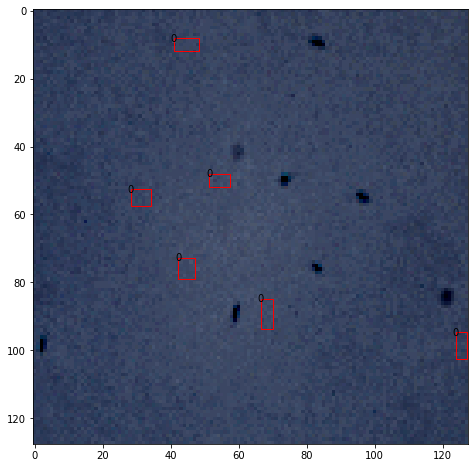

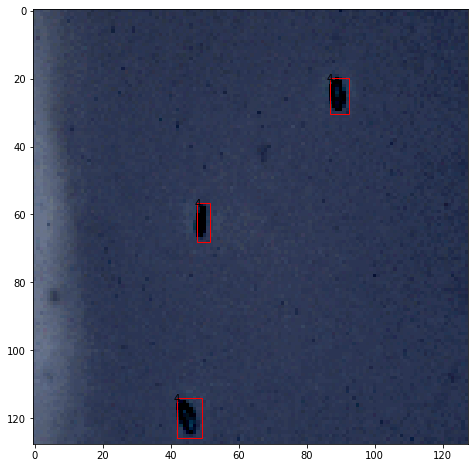

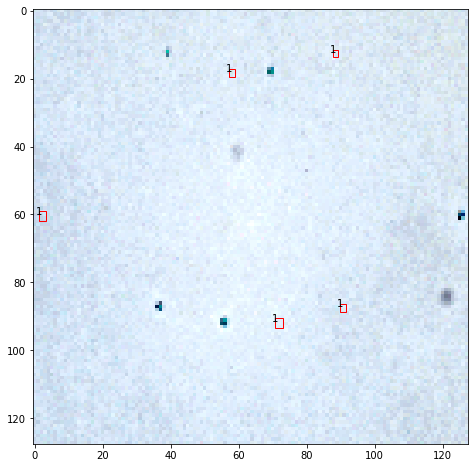

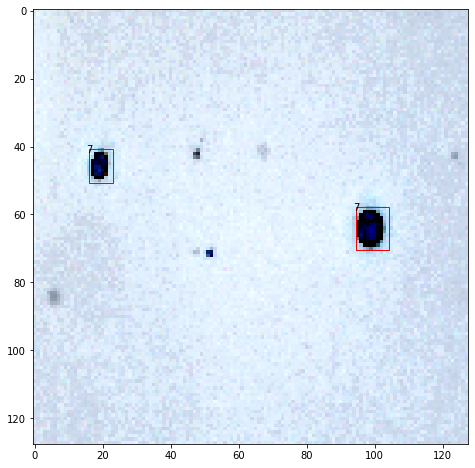

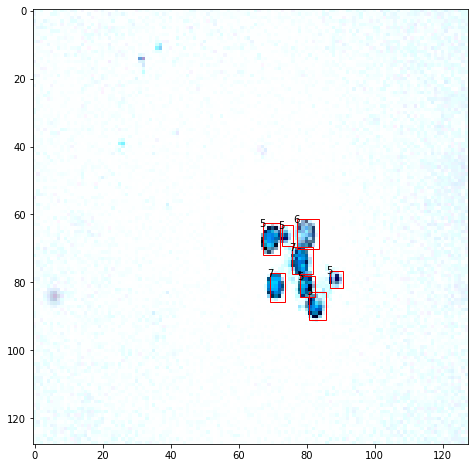

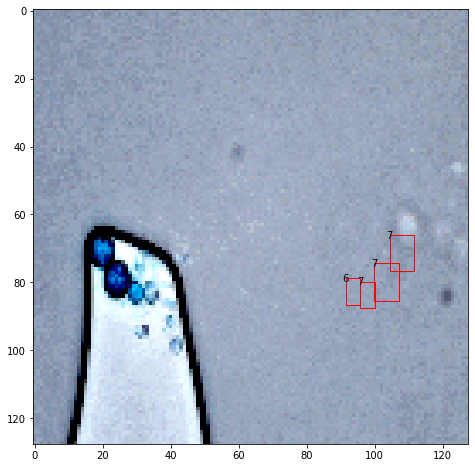

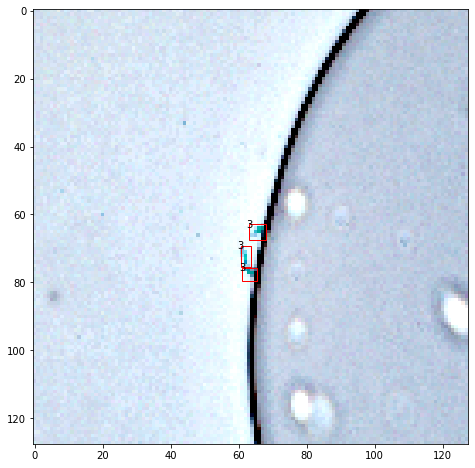

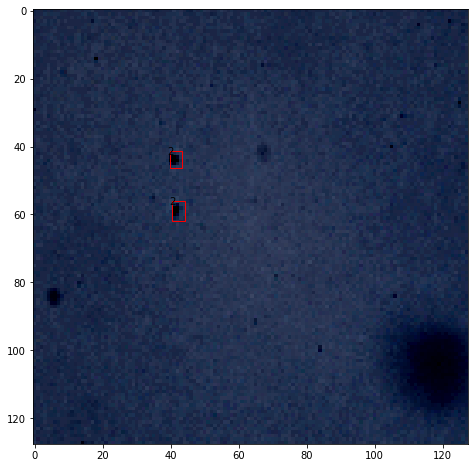

In [67]:
photo = []
photo_label = []
for i in pos:
    num_img, label = train_dataloader[i]
    num_img = np.array(num_img)
    num_img = num_img.swapaxes(0, 1)
    num_img = num_img.swapaxes(1, 2)
    photo.append(num_img)
    photo_label.append(label)
plt.figure(figsize=(12,16))
for i in range(len(pos)):
    plot_rect(photo[i], photo_label[i])


In [31]:
photo_label[-1]

[[2.0,
  0.3240726090014065,
  0.3427548951740506,
  0.026810829817158953,
  0.03770272943037978],
 [2.0,
  0.33110495780590715,
  0.46142578125,
  0.030327004219409304,
  0.04635581487341772]]

In [32]:
for coord in photo_label[-1]:
    print(coord)

[2.0, 0.3240726090014065, 0.3427548951740506, 0.026810829817158953, 0.03770272943037978]
[2.0, 0.33110495780590715, 0.46142578125, 0.030327004219409304, 0.04635581487341772]


In [ ]:
plt.imshow(img)
index = 0
for data in new_list_1:
    index += 1
    plt.scatter(x=data['x_'],y=data['y_'],s = 1)
    plt.text(data['x_'], data['y_'], '{:0.0f}'.format(index), ha='center', va='center')
plt.show()
plt.gca().add_patch(plt.Rectangle(xy=(cat_dict['bbox'][i][1], cat_dict['bbox'][i][0]),
                                  width=cat_dict['bbox'][i][3] - cat_dict['bbox'][i][1], 
                                  height=cat_dict['bbox'][i][2] - cat_dict['bbox'][i][0],
                                  edgecolor=[c / 255 for c in label_colors[cat_idx]],
                                  fill=False, linewidth=2))

In [66]:
def plot_rect(image, label):
    plt.figure(figsize=(8,8))
    plt.imshow(image)
    if(len(image.shape) == 3):
        
        width,height,channel = image.shape
    else:
        width,height = image.shape
    for coord in label:
        class_number, x,y,w,h= coord 
        centerx = width*(x - w/2)
        centery = height*(y - h/2)
        W = w * width
        H = h * height
        plt.gca().add_patch(
            plt.Rectangle(
                xy=(centerx,centery),
                width=W, 
                height=H,
                edgecolor='red',
                fill=False, linewidth=1
            )
        )
        plt.text(centerx, centery, '{}'.format(int(class_number)), ha='center', va='center')
    return 

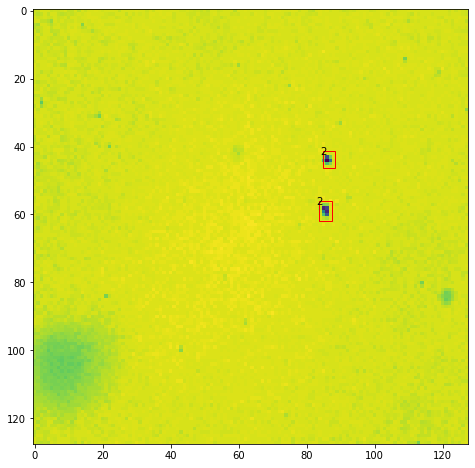

In [58]:
plot_rect(photo[-1][:,:,0], photo_label[-1])

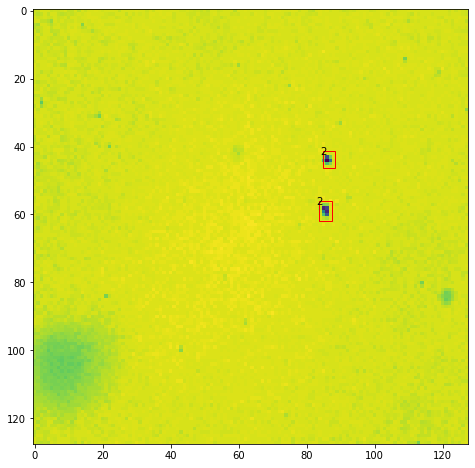

In [56]:
plt.figure(figsize=(8,8))
plt.imshow(photo[-1][:,:,0])
width,height = photo[-1][:,:,0].shape
for coord in photo_label[-1]:
    class_number, x,y,w,h= coord 
    centerx = width*((1-x) - w/2)
    centery = height*(y - h/2)
    W = w * width
    H = h * height
    plt.gca().add_patch(
        plt.Rectangle(
            xy=(centerx,centery),
            width=W, 
            height=H,
            edgecolor='red',
            fill=False, linewidth=1
        )
    )
    plt.text(centerx, centery, '{}'.format(int(class_number)), ha='center', va='center')

In [ ]:
import os
import glob
file_path =r'E:\Dataset\training_set\train\labels'
file = glob.glob(file_path+'/*.txt')
# print(file)
maxNum = 0

for i in file:
    label = []
    with open(i) as f:
        lines = f.readlines()
        for line in lines:
            x = line.replace('\n', '').split(' ')
            x = [float(i) for i in x]
            label.append(x)
    if(len(label)>maxNum):
        maxNum = len(label)
        print(i)